In [199]:
import pandas_datareader.data as web
from nsepy import get_history
from datetime import date

In [201]:
# # df = get_history(symbol='SBIN',
# #                     start=date(2015,1,1), 
# #                     end=date(2022,3,29))
# sbin = get_history(symbol='SBIN',
#                     start=date(2015,1,1), 
#                     end=date(2023,3,31))

In [2]:
# sbin

# STORIX

In [3]:
# df.to_csv('SBI.csv')

In [145]:
import pandas as pd

In [146]:
df = pd.read_csv('SBI.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,2023-03-23,SBIN,EQ,521.55,519.40,521.00,511.50,512.0,512.75,517.21,22097792,1.142911e+15,261069,11342410,0.5133
2039,2023-03-24,SBIN,EQ,512.75,514.50,514.95,503.45,505.5,505.35,510.24,14416984,7.356153e+14,194898,5424799,0.3763
2040,2023-03-27,SBIN,EQ,505.35,507.00,514.15,501.55,509.0,510.15,509.28,15674218,7.982619e+14,224703,3952164,0.2521
2041,2023-03-28,SBIN,EQ,510.15,511.45,511.75,503.85,509.0,508.10,507.96,15833599,8.042853e+14,199721,4623581,0.2920


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2043 non-null   object 
 1   Symbol              2043 non-null   object 
 2   Series              2043 non-null   object 
 3   Prev Close          2043 non-null   float64
 4   Open                2043 non-null   float64
 5   High                2043 non-null   float64
 6   Low                 2043 non-null   float64
 7   Last                2043 non-null   float64
 8   Close               2043 non-null   float64
 9   VWAP                2043 non-null   float64
 10  Volume              2043 non-null   int64  
 11  Turnover            2043 non-null   float64
 12  Trades              2043 non-null   int64  
 13  Deliverable Volume  2043 non-null   int64  
 14  %Deliverble         2043 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 239.5+

In [148]:
import numpy as np
# df1 = np.array(df1).reshape(-1,1)
# df1.size

In [149]:
import matplotlib.pyplot as plt

In [150]:
training_set = df.iloc[:,8].values
training_set = training_set.reshape(-1,1)
training_set.size

2043

In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
training_set = scaler.fit_transform(training_set)
training_set.size

2043

In [152]:
trainig_data_len = int(len(training_set) * 0.94855305466237942122186495176849)
trainig_data_len

1937

In [153]:
train_data,test_data = training_set[0:trainig_data_len,:],training_set[trainig_data_len:len(training_set),:]
print(train_data.size,test_data.size)

1937 106


In [154]:
train_data.shape

(1937, 1)

In [155]:
test_data.shape

(106, 1)

In [156]:
import numpy
def create_dataset(dataset, time_step = 1):
    datax , datay = [] ,[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(datax), numpy.array(datay)

In [157]:
time_step = 50
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [158]:
print(x_train)

[[0.34372696 0.34636048 0.34109344 ... 0.28294533 0.28652691 0.27367534]
 [0.34636048 0.34109344 0.31402086 ... 0.28652691 0.27367534 0.27557147]
 [0.34109344 0.31402086 0.31454756 ... 0.27367534 0.27557147 0.27862636]
 ...
 [0.77857369 0.76656484 0.78773833 ... 0.86716528 0.8480986  0.85231223]
 [0.76656484 0.78773833 0.80027389 ... 0.8480986  0.85231223 0.86379437]
 [0.78773833 0.80027389 0.79026651 ... 0.85231223 0.86379437 0.88412514]]


In [159]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape ,x_test.shape,y_train.shape,y_test.shape)

(1886, 50, 1) (55, 50, 1) (1886,) (55,)


In [160]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Activation
from keras.metrics import Accuracy

In [161]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [162]:
# def create_model(layers, activation):
#     model = Sequential()
#     for i, nodes in enumerate(layers):
#         if i == 0:
#             model.add(LSTM(nodes, input_shape=(None, 1)))
#             model.add(Activation(activation))
#         else:
#             model.add(Dense(nodes))
#             model.add(Activation(activation))
#     model.add(Dense(1))
    
#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=create_model, verbose=0)

In [163]:
# model

In [164]:
# layers = [[60],[50,25],[50,30,15],[50,30]]
# activation = ['sigmoid','relu']
# param_grid = dict(layers = layers,activation = activation,batch_size = [25,60,128,256],epochs = [50,60,70,100])
# grid = GridSearchCV(estimator = model, param_grid=param_grid)

In [165]:
# grid_result = grid.fit(x_train, y_train)

In [166]:
# [grid_result.best_score_,grid_result.best_param_]

In [167]:
model = Sequential()

model.add(LSTM(units = 50,return_sequences=True, input_shape= (50,1)))
model.add(LSTM(units = 50,return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [168]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 30)                1530      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 32,161
Trainable params: 32,161
Non-trainable params: 0
_________________________________________________________________


In [169]:
# model.fit(x_train, y_train, batch_size=1, epochs=1)
model.fit(x_train, y_train, validation_data = (x_test,y_test),batch_size=60,epochs=100)

Epoch 1/100
32/32 [==============================] - 7s 60ms/step - loss: 0.0251 - val_loss: 0.0023
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 9.8504e-04 - val_loss: 0.0019
Epoch 8/100
32/32 [==============================] - 2s 49ms/step - loss: 9.3086e-04 - val_loss: 0.0017
Epoch 9/100
32/32 [==============================] - 2s 48ms/step - loss: 8.9870e-04 - val_loss: 0.0025
Epoch 10/100
32/32 [==============================] - 2s 50ms/step - loss: 8.2857e-04 - 

32/32 [==============================] - 2s 50ms/step - loss: 2.5906e-04 - val_loss: 5.6531e-04
Epoch 79/100
32/32 [==============================] - 2s 49ms/step - loss: 2.7062e-04 - val_loss: 4.7894e-04
Epoch 80/100
32/32 [==============================] - 2s 50ms/step - loss: 2.5471e-04 - val_loss: 5.5819e-04
Epoch 81/100
32/32 [==============================] - 2s 50ms/step - loss: 2.4348e-04 - val_loss: 5.3721e-04
Epoch 82/100
32/32 [==============================] - 2s 49ms/step - loss: 2.6048e-04 - val_loss: 5.9107e-04
Epoch 83/100
32/32 [==============================] - 2s 50ms/step - loss: 2.7522e-04 - val_loss: 4.9363e-04
Epoch 84/100
32/32 [==============================] - 2s 50ms/step - loss: 2.3976e-04 - val_loss: 5.1317e-04
Epoch 85/100
32/32 [==============================] - 2s 49ms/step - loss: 2.4266e-04 - val_loss: 4.7269e-04
Epoch 86/100
32/32 [==============================] - 2s 49ms/step - loss: 2.4698e-04 - val_loss: 4.6147e-04
Epoch 87/100
32/32 [============

In [170]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 12ms/step


In [171]:
train_predict.shape

(1886, 1)

In [172]:
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

In [173]:
train_predict.shape

(1886, 1)

In [174]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt (mean_squared_error(y_train , train_predict))

319.7993590942893

In [175]:
rmse = np.sqrt(np.mean(((test_predict - y_test) ** 2)))
rmse

542.3327486279328

In [176]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1])
x_train.shape

(1886, 50)

In [177]:
train = df[:trainig_data_len]
valid = df[trainig_data_len:]

In [178]:
valid

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1937,2022-10-28,SBIN,EQ,579.65,579.95,582.65,567.00,571.80,570.75,572.65,10043644,5.751516e+14,144061,3054910,0.4319
1938,2022-10-31,SBIN,EQ,570.75,574.95,577.45,568.40,573.50,573.80,572.79,9894639,5.667560e+14,139535,3759140,0.3799
1939,2022-11-01,SBIN,EQ,573.80,576.35,585.75,574.60,576.00,576.90,579.85,12069579,6.998554e+14,163499,5057539,0.4190
1940,2022-11-02,SBIN,EQ,576.90,575.90,578.95,569.90,573.00,573.85,574.79,10241440,5.886695e+14,142730,3773099,0.3684
1941,2022-11-03,SBIN,EQ,573.85,569.00,587.95,568.00,584.15,584.90,581.58,17557998,1.021139e+15,244825,5121059,0.2917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,2023-03-23,SBIN,EQ,521.55,519.40,521.00,511.50,512.00,512.75,517.21,22097792,1.142911e+15,261069,11342410,0.5133
2039,2023-03-24,SBIN,EQ,512.75,514.50,514.95,503.45,505.50,505.35,510.24,14416984,7.356153e+14,194898,5424799,0.3763
2040,2023-03-27,SBIN,EQ,505.35,507.00,514.15,501.55,509.00,510.15,509.28,15674218,7.982619e+14,224703,3952164,0.2521
2041,2023-03-28,SBIN,EQ,510.15,511.45,511.75,503.85,509.00,508.10,507.96,15833599,8.042853e+14,199721,4623581,0.2920


In [179]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test_predict.shape)
print(train_predict.shape)

(1886, 50)
(55, 50, 1)
(1886,)
(55,)
(55, 1)
(1886, 1)


In [180]:
pred = []
for i in range(0,len(train_predict)):
    pred.append(train_predict[i])
for i in range(0,len(test_predict)):
    pred.append(test_predict[i])

len(pred)


1941

In [181]:
today = df.iloc[1076:2041,8].values

In [182]:
today = today.reshape(-1,1)
today = scaler.fit_transform(today)

In [183]:
today = today.reshape(1,today.shape[0],today.shape[1])

In [184]:
today.shape
today

array([[[0.3311914 ],
        [0.32876857],
        [0.34509639],
        [0.33972401],
        [0.34741388],
        [0.35478774],
        [0.40840619],
        [0.39334246],
        [0.40082166],
        [0.40313916],
        [0.43084378],
        [0.44422206],
        [0.44074581],
        [0.41672812],
        [0.42705151],
        [0.42483936],
        [0.43105446],
        [0.42462867],
        [0.39197303],
        [0.40282313],
        [0.40756347],
        [0.41346255],
        [0.40693142],
        [0.41219846],
        [0.40651006],
        [0.39397451],
        [0.3986095 ],
        [0.39608132],
        [0.40935426],
        [0.41830823],
        [0.42631413],
        [0.43337196],
        [0.43674286],
        [0.44517013],
        [0.44327399],
        [0.44390604],
        [0.45012114],
        [0.45359739],
        [0.45623091],
        [0.46307806],
        [0.43073844],
        [0.43958706],
        [0.42842094],
        [0.44738228],
        [0.44822501],
        [0

In [185]:
todaypred = model.predict(today)

1/1 [==============================] - 1s 949ms/step


In [186]:

todaypred = scaler.inverse_transform(todaypred)

In [187]:
todaypred

array([[502.9247]], dtype=float32)

In [188]:
y_train = y_train.reshape(y_train.shape[0],1)
y_train

array([[0.27557147],
       [0.27862636],
       [0.28747498],
       ...,
       [0.86379437],
       [0.88412514],
       [0.90108501]])

In [189]:
y_train = scaler.inverse_transform(y_train)

In [190]:
train_predict

array([[280.59235],
       [279.76068],
       [280.81342],
       ...,
       [549.4353 ],
       [553.7005 ],
       [563.0195 ]], dtype=float32)

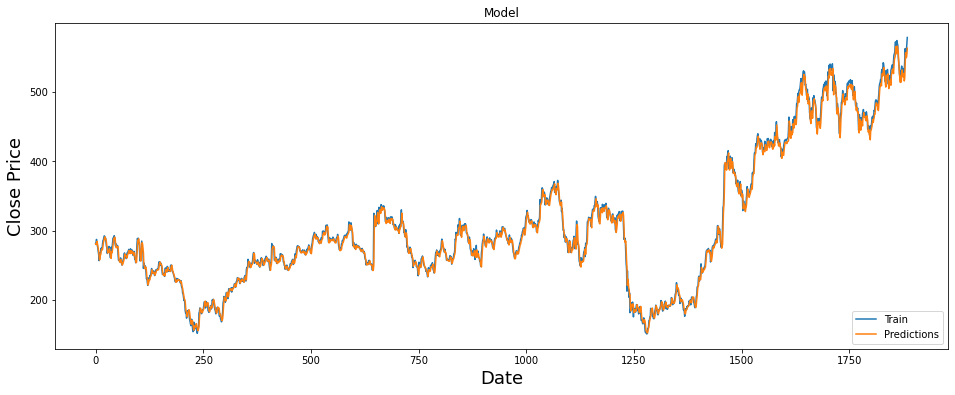

In [193]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(y_train)
plt.plot(train_predict)


plt.legend(['Train', 'Predictions'], loc='lower right')
# plt.show()